In [57]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [58]:
df = pd.DataFrame()
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['y'] = [1,1,0,1,0,1,0,1,0,0]
df

,x1,x2,y
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

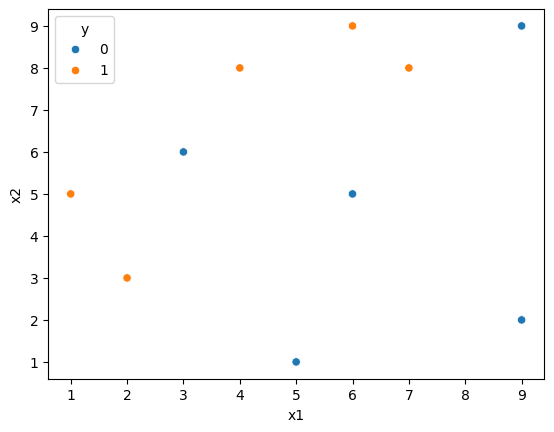

In [59]:
import seaborn as sns
sns.scatterplot(data=df, x='x1', y='x2', hue='y')

In [60]:
df['weight'] = 1/df.shape[0]
df

,x1,x2,y,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [63]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [64]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

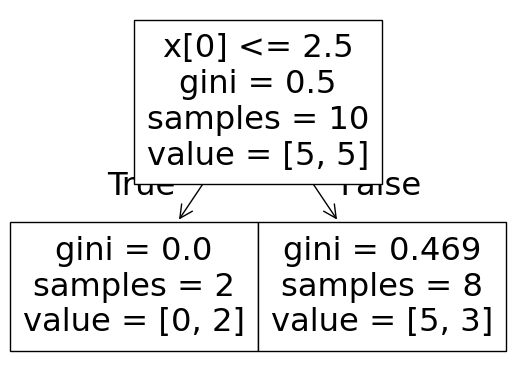

In [65]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

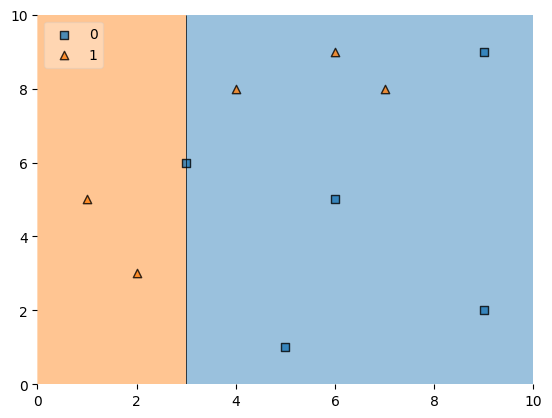

In [66]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [67]:
df['y_pred'] = dt1.predict(X)
df

,x1,x2,y,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [68]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [69]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [70]:
def update_model_weight(row, alpha = 0.423):
    if row['y'] == row['y_pred']:
        return row['weight'] * np.exp(-alpha)
    else:
        return row['weight'] * np.exp(alpha)

In [71]:
df['updated_weight'] = df.apply(update_model_weight, axis=1)

In [72]:
df

,x1,x2,y,weight,y_pred,updated_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [73]:
df['updated_weight'].sum()

0.9165153319682015

In [74]:
df['normalized_weight'] = df['updated_weight']/df['updated_weight'].sum()

In [75]:
df

,x1,x2,y,weight,y_pred,updated_weight,normalized_weight
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [76]:
df['normalized_weight'].sum()

1.0

In [77]:
df['cumsum_upper'] = np.cumsum(df['normalized_weight'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weight']
df[['x1', 'x2', 'y', 'weight', 'y_pred', 'updated_weight', 'normalized_weight', 'cumsum_lower', 'cumsum_upper']]

,x1,x2,y,weight,y_pred,updated_weight,normalized_weight,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [78]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [79]:
index_values = create_new_dataset(df)

index_values

[3, 2, 7, 3, 7, 8, 0, 0, 7, 0]

In [80]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [81]:
second_df

,x1,x2,y,weight
3,4,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
0,1,5,1,0.1


In [82]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 8.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.5, '  False')]

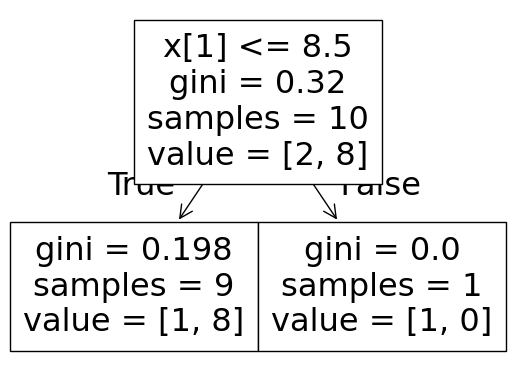

In [83]:
plot_tree(dt2)

<Axes: >

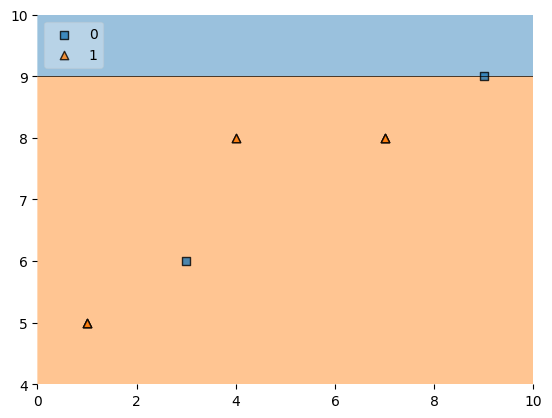

In [84]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [85]:
second_df['y_pred'] = dt2.predict(X)

In [86]:
second_df

,x1,x2,y,weight,y_pred
3,4,8,1,0.1,1
2,3,6,0,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,0
0,1,5,1,0.1,1
0,1,5,1,0.1,1
7,7,8,1,0.1,1
0,1,5,1,0.1,1


In [87]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [88]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['y'] == row['y_pred']:
    return row['weight'] * np.exp(-alpha)
  else:
    return row['weight'] * np.exp(alpha)

In [89]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [90]:
second_df

,x1,x2,y,weight,y_pred,updated_weights
3,4,8,1,0.1,1,0.033622
2,3,6,0,0.1,1,0.297427
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
0,1,5,1,0.1,1,0.033622


In [91]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

second_df

,x1,x2,y,weight,y_pred,updated_weights,nomalized_weights
3,4,8,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
7,7,8,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034


In [92]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [93]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [94]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [95]:
second_df[['x1','x2','y','weight','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,x1,x2,y,weight,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
3,4,8,1,0.1,1,0.056034,0.000000,0.056034
2,3,6,0,0.1,1,0.495694,0.056034,0.551728
7,7,8,1,0.1,1,0.056034,0.551728,0.607762
3,4,8,1,0.1,1,0.056034,0.607762,0.663796
7,7,8,1,0.1,1,0.056034,0.663796,0.719830
8,9,9,0,0.1,0,0.056034,0.719830,0.775864
0,1,5,1,0.1,1,0.056034,0.775864,0.831898
0,1,5,1,0.1,1,0.056034,0.831898,0.887932
7,7,8,1,0.1,1,0.056034,0.887932,0.943966
0,1,5,1,0.1,1,0.056034,0.943966,1.000000


In [96]:
index_values = create_new_dataset(second_df)

In [97]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [98]:
third_df

,x1,x2,y,weight
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1


In [99]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

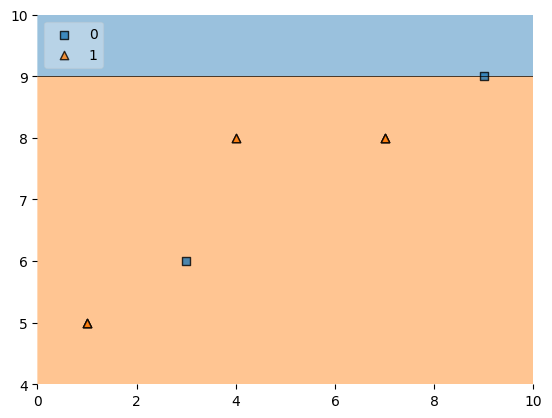

In [100]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [101]:
third_df['y_pred'] = dt3.predict(X)

third_df

,x1,x2,y,weight,y_pred
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
0,1,5,1,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1


In [102]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [103]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [104]:
df

,x1,x2,y,weight,y_pred,updated_weight,normalized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


#### Predictions

In [105]:
query = np.array([1,5]).reshape(1,2)
print(dt1.predict(query), dt2.predict(query), dt3.predict(query))

[1] [1] [1]


In [106]:
alpha1*1 + alpha2*1 + alpha3*1

1.09861228866811

In [107]:
np.sign(1.09)

1.0

In [108]:
query = np.array([9,9]).reshape(1,2)
print(dt1.predict(query), dt2.predict(query), dt3.predict(query))

[0] [0] [0]


In [110]:
alpha1*-1 + alpha2*-1 + alpha3*-1

-1.09861228866811

In [111]:
np.sign(-1.09)

-1.0